In [1]:
import os
os.chdir(os.getenv("WORKINGDIR"))
import numpy as np
from numpy.typing import ArrayLike
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from skipper_image_analysis.utils import (
    plot_ccd_image, correct_overscan, get_rowcol_ovserscan
)
from scipy.optimize import curve_fit

# Matplotlib settings
%config InlineBackend.figure_format = "retina"  # For high dpi figures in notebook
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.dpi"] = 120
plt.rcParams["legend.fontsize"] = "medium"
plt.rcParams["axes.labelsize"] = "large"


ganancia = {
    0: 210,
    1: 232,
    2: 207,
    3: 159
}
PRESCAN_PIX = 8

# Detección de dipolos

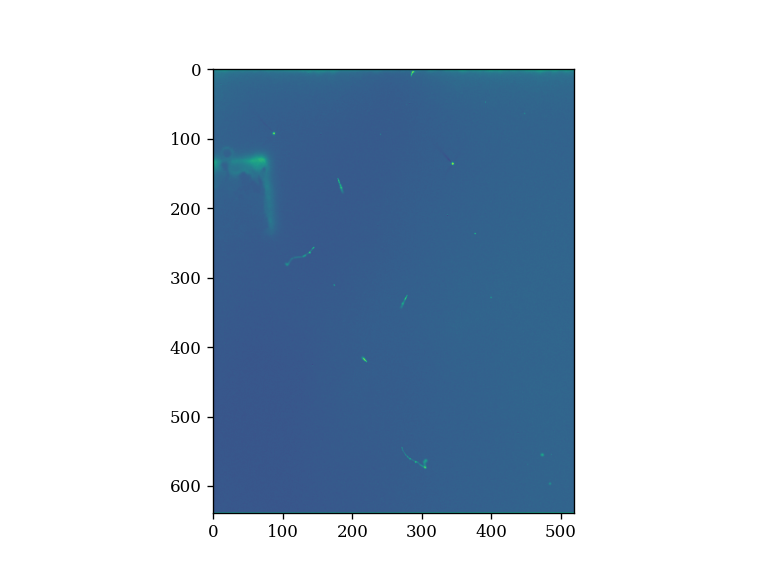

In [6]:
data_dir = 'skipper_data\Imagenes_Santi'
t_ilum = 0.25
threshold = 0.2*10**11
test_image = fits.open(f'{data_dir}\proc_skp_mod45_2ndbatch_T150_Vv2_seqrevOS_vdd-17_loopdtph_wledon140_npump40000_dtph100_NSAMP10_NROW650_NCOL650_EXPOSURE0_NBINROW1_NBINCOL1_img40.fits')
#test_image = fits.open(f'{data_dir}\proc_skp_mod45_2ndbatch_T150_Vv2_seqrevOS_vdd-17_loopdtph_wledon140_npump40000_dtph2000000_NSAMP10_NROW650_NCOL650_EXPOSURE0_NBINROW1_NBINCOL1_img58.fits')
#test_image = correct_overscan(test_image)
test_frame = test_image[0].data
r_overscan, c_overscan = get_rowcol_ovserscan(test_image)
test_frame = test_frame[:-r_overscan, PRESCAN_PIX+1:-c_overscan]
test_frame = test_frame-np.median(test_frame)
dif_1 = np.diff(test_frame, axis=0, )
dif_2 = np.diff(test_frame[::-1], axis=0, )[::-1]
mascara_dipolos = np.zeros_like(dif_1, dtype=int)

prod_arr = test_frame[:-1] * test_frame[1:]
#prod_arr = dif_1 * dif_2
mascara_dipolos[prod_arr>=-threshold] = 0
mascara_dipolos[prod_arr<-threshold] = 1
%matplotlib widget
#
# filtro_dipolos
#plt.imshow(np.log(np.abs(dif_1)+1))
plt.imshow(test_frame)
#plt.colorbar()

plt.show()

#plt.imshow(prod_arr)
#plt.colorbar()
#plt.show()
#plt.imshow(np.log(np.abs(mascara_dipolos)+1))
#plt.colorbar()
#plt.show()
#plt.imshow(np.log(np.abs(test_frame)+1))
#plt.imshow(test_frame)
#plt.colorbar()
#plt.show()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
21 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
255 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
92 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 1

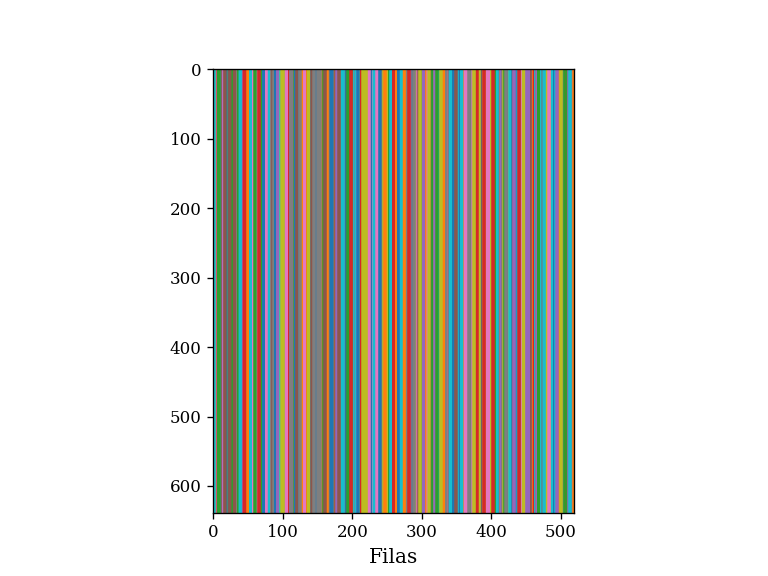

KeyboardInterrupt: 

In [7]:
for j, col in enumerate(prod_arr.T):
    plt.plot(col)
    for i, val in enumerate(col):
        if val < -threshold:
            print(i, j)
#for col in dif_1.T:
#    plt.plot(col)
plt.xlabel("Filas")
#plt.axhline(threshold, xmin = 0, xmax = 828, ls = '--', color='k')
plt.axhline(-threshold, xmin = 0, xmax = 828, ls ='--', color = 'k')

plt.show()
for col in test_frame.T:
    plt.plot(col)

plt.xlabel("Filas")
plt.show()